In [360]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import numpy as np

%pylab inline
pylab.rcParams['figure.figsize'] = (15,9)

Populating the interactive namespace from numpy and matplotlib


In [361]:
def aggregate(df):
    return df.groupby([0,1])[df.columns[1:55]].min()

In [362]:
out_dir = '../papi_output/'
path = out_dir + 'o4p-c.csv'

df = pd.read_csv(path, header=None)
df = aggregate(df)
df = df.sample(frac=1) # shuffle for better cross-validation

In [363]:
x = df.iloc[:,1:53].as_matrix()
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
y = df.iloc[:,53].as_matrix()

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [374]:
pca = PCA(n_components=17)
pca.fit(x)
x2 = pca.transform(x)

In [375]:
svr = SVR(kernel='poly', C=1, epsilon=.1)
svr.fit(x2, y)
print(svr.get_params())

groups = df.index.get_level_values(0)
scores = cross_val_score(svr, x2, y, cv=3, groups=groups) 
scores.mean()

{'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


-0.93158365900968276

In [366]:
pca.explained_variance_ratio_.sum()

0.99099061392823939

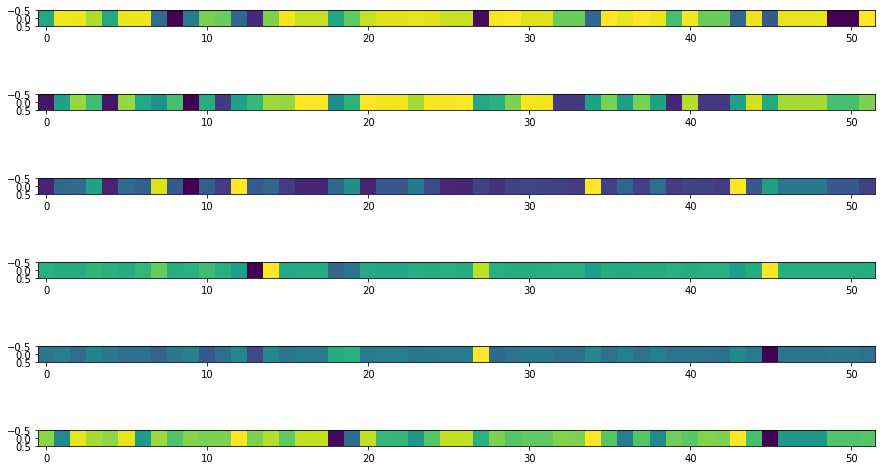

In [367]:
# just to visualize which of 52 PAPI output events are most significant (marked in yellow)

fig, axs = plt.subplots(nrows=6)
for i, ax in enumerate(axs): 
    ax.imshow(pca.components_[i:i+1])
plt.show()

In [368]:
scores

array([  0.26420064,   0.19031984, -23.3128212 ])

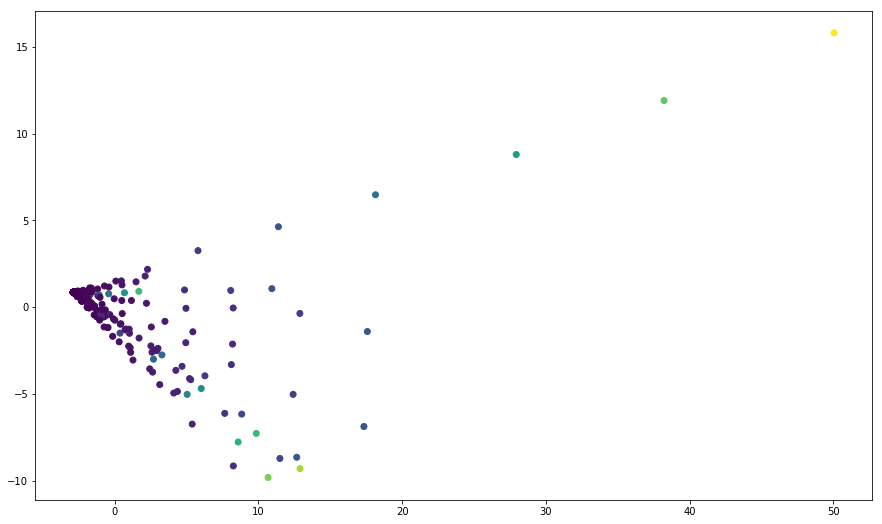

In [388]:
pcaqq = PCA(n_components=2)
pcaqq.fit(x)
x2qq = pca.transform(x)
plt.scatter(x2qq[:,0], x2qq[:,1], c=y)